# Simple puzzle

In this exercise we will build on the previous lesson.

We will use the State class to capture the state of the maze.

We will create a Node and Problem class to find the solution to the puzzle.

# Initial and final state
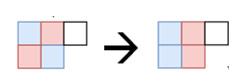

The library allows copying of complex structures

In [ ]:
import copy

We have the State class ready from last time.

In [ ]:
class State:
    """ Puzzle state
    
    gameplan - two-dimensional array
             - 0 - space
             - 1 - blue
             - 2 - red
    row      - row position of the space, for faster searching
    column -  column position of the space
    """

    # Generated will contain the number of instances created 
    generated = 0
    
    def __init__(self, gameplan, row, column):
        # Class constructor
        # check if the position of the space is correctly entered        
        assert (gameplan[row][column] == 0)
                
        # assignining variables with input parameters
        self.gameplan = []
        self.gameplan = gameplan
        self.row = row
        self.column = column

        State.generated += 1
        
    def __eq__(self, other):
        # comparison operator overload, only the gameplan needs to be compared
        return self.gameplan == other.gameplan        
        
    def expand(self, action):
        """ The method returns the new state of the puzzle according to the specified action
        
            If the action is invalid for the puzzle state, None is returned

            action - move l, r, u, d
        """
        
        if action == 'l':
            # check if the movement is valid
            if self.column > 0:
                # depth copy of the puzzle state
                new_gameplan = copy.deepcopy(self.gameplan)

                # stone replacement in new condition
                new_gameplan[self.row][self.column] = new_gameplan[self.row][self.column - 1]                
                new_gameplan[self.row][self.column - 1] = 0

                # create new object State
                return State(new_gameplan, self.row, self.column - 1)
        if action == 'r':
            if (self.row == 0 and self.column < 2) or (self.row == 1 and self.column < 1):
                new_gameplan = copy.deepcopy(self.gameplan)
                new_gameplan[self.row][self.column] = new_gameplan[self.row][self.column + 1]
                new_gameplan[self.row][self.column + 1] = 0
                return State(new_gameplan, self.row, self.column + 1)
        if action == 'u':
            if self.row > 0 and self.column < 2:
                new_gameplan = copy.deepcopy(self.gameplan)
                new_gameplan[self.row][self.column] = new_gameplan[self.row - 1][self.column]
                new_gameplan[self.row - 1][self.column] = 0
                return State(new_gameplan, self.row - 1, self.column)
        if action == 'd':
            if self.row < 1 and self.column < 2:
                new_gameplan = copy.deepcopy(self.gameplan)
                new_gameplan[self.row][self.column] = new_gameplan[self.row + 1][self.column]
                new_gameplan[self.row + 1][self.column] = 0
                return State(new_gameplan, self.row + 1, self.column)
        else:
            return None

The Node class represents a node in a tree or graph.

* **Attributes**
    * **parent** - reference to the parent node
    * **state** - the State object represents the state of the puzzle
    * **action** - the action that led to this node
    * **depth** - the depth of the node in the tree

* **Method**
    * The **_\_eq\_** method is overloaded to compare only the puzzle state (State class) when comparing two nodes. Comparing other properties would lead to an error in the algorithm.
    * The **successors** method returns a list of successors, for all allowed actions. Expand all possible actions. If an allowed state (not None) is created, include it in the list it returns.
    The * **path** method returns a list of actions to get from the root to the given node.

In [ ]:
class Node:
    """
        Node for searching
        
        parent - reference to the parent node
        state  - object State - the state of the puzzle
        action - the action that led to this node
        depth - tree depth
    """

    def __init__(self, parent=None, state=None, action=None, depth=0):
        self.parent = parent
        self.state = state
        self.action = action
        self.depth = depth

    def __eq__(self, other):        
        return self.state == other.state
    
    def succesors(self, actions):        
        succesors = []
        for action in actions:
            new_state = self.state.expand(action)
            if new_state is not None:
                # create a new node
                succesors.append(Node(parent=self,
                                      state=new_state,
                                      action=action,
                                      depth=self.depth + 1))
        return succesors

    def path(self):
        actions = []
        node=self
        while node.action is not None:
            actions.append(node.action)
            node = node.parent
        # path reversal
        actions.reverse()
        return actions

Class Problem represent the task.

* **Attributes**
    * **fringe** is a list of nodes to scan, initially populated with the initial state
    * **goal** is the goal state. For this problem, we assume that there is one
    * **actions** is a list of possible actions    

* **Method**   
    * **goal_test** method compares the state with the target state and returns the logical value of the comparison
    * **select_from** is a method that selects one of the nodes from the list of nodes to fringe scan.
    * **tree_search** implements a tree search of the state space that does not check for nodes already visited
    * **graph_search** implements a state space search with a graph algorithm that checks for vertices already visited

In [ ]:
class Problem:
    """
        Main class
        
        fringe  - list of nodes to scan
        goal    - target state 
        actions - list of possible actions        
    """

    def __init__(self, initial_state, goal, actions):
        # initial state goes into the list to scan the fringe
        self.fringe = []
        self.fringe.append(Node(parent=None, state=initial_state, action=None, depth=0))
        self.goal = goal
        self.actions = actions        

    def goal_test(self, state):
        if self.goal == state:
            return True
        else:
            return False

    def select_from(self, fringe, strategy):        
        # The input is the search strategy. So far, searching in width and depth
        if strategy=="BFS":
            return fringe.pop(0)
        else:
            # DFS
            return fringe.pop(-1)

    def tree_search(self, strategy):    
        while True:
            # length check list to scan
            if len(self.fringe) == 0:
                return None
                        
            # node selection for further expansion 
            node = self.select_from(self.fringe, strategy)

            # node selection for expansion may fail (e.g. for DLS)
            if node is None:
                return None            
            
            # check if it's not the goal state
            if self.goal_test(node.state):
                return node
            
            # extension of the searchable list
            self.fringe.extend(node.succesors(self.actions))

    def graph_search(self, strategy):
        explored = []
        while True:
            # length check list to scan
            if len(self.fringe) == 0:
                return None
            
            # node selection for further expansion 
            node = self.select_from(self.fringe, strategy)

            # node selection for expansion may fail (e.g. for DLS)
            if node is None:
                return None            
            
            # check if the state is not the goal
            if self.goal_test(node.state):
                return node
            
            # add a node to the list of searched nodes
            explored.append(node)
            
            # expanze nodu
            succesors = node.succesors(self.actions)

            # only nodes that have not yet been scanned or are not in the fridge will be added to the list of nodes to scan
            for succesor in succesors:
                if (succesor not in explored) and (succesor not in self.fringe):
                    self.fringe.append(succesor)

# Transitions between states
The figure shows a diagram that illustrates the possible transitions between states.

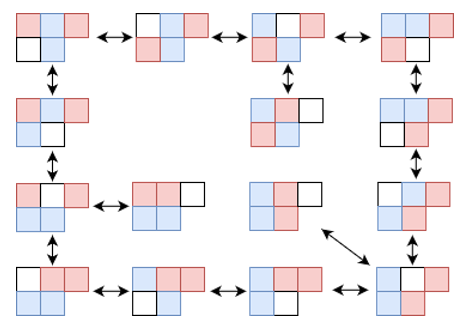

# Breadth-first search (BFS) in tree
The process of finding a solution using BFS.
* Initialization of the problem (initial and goal state, allowed actions)
* Running the algorithm
* Printing the solution

In [ ]:
problem = Problem(initial_state=State(gameplan=[[1, 2, 0], [2, 1]], 
                                      row=0, 
                                      column=2),
                goal=State([[1, 2, 0], [1, 2]], 0, 2),
                actions=['l', 'r', 'u', 'd'],
                )

In [ ]:
State.generated = 0
solution = problem.tree_search(strategy='BFS')
print (f"Number of states searched is {State.generated}.")

In [ ]:
if solution is not None:
    print (solution.path())
else:
    print ("The problem has no solution.")

# Breadth-first search (BFS) in graph
The process of finding a solution using BFS, but a graph algorithm that checks if the node has already been visited.
* Initialization of the problem (initial and final state, allowed actions)
* Running the algorithm
* Printing the solution

Compare the number of visited nodes with the previous algorithm.

In [ ]:
problem_bfs2 = Problem(initial_state=State(gameplan=[[1, 2, 0], [2, 1]], 
                                      row=0, 
                                      column=2),
                goal=State([[1, 2, 0], [1, 2]], 0, 2),                      
                actions=['l', 'r', 'u', 'd'],                
                )

In [ ]:
State.generated = 0
solution_bfs2 = problem_bfs2.graph_search(strategy='BFS')
print (f"Number of states searched is {State.generated}.")

In [ ]:
if solution_bfs2 is not None:
    print (solution_bfs2.path())
else:
    print ("The problem has no solution.")

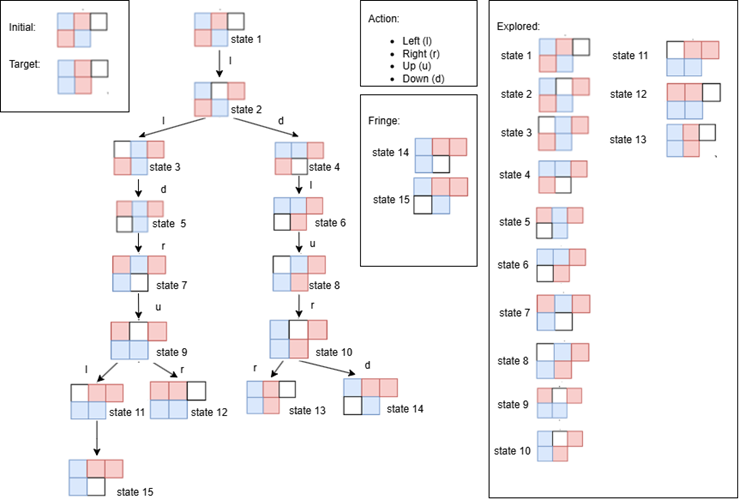

# Depth First Search (DFS)
Finding a solution using DFS
* Problem initialization (initial and target state, allowed actions)
* Running the algorithm
* Printing the solution

Compare the number of nodes visited with the previous algorithm.

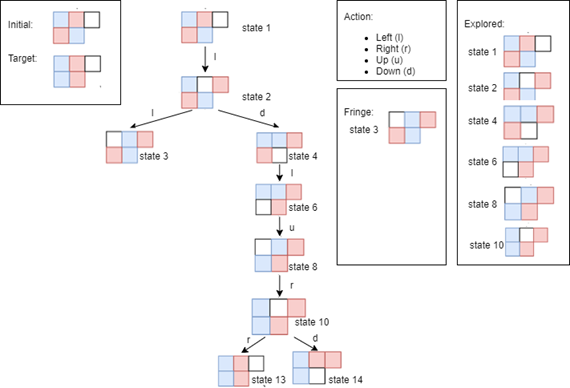

In [ ]:
problem_dfs = Problem(initial_state=State([[1, 2, 0], [2, 1]], 0, 2),
                goal=State([[1, 2, 0], [1, 2]], 0, 2),                      
                actions=['l', 'r', 'u', 'd'],                
                )

In [ ]:
State.generated = 0
solution_dfs = problem_dfs.graph_search(strategy='DFS')
print (f"Number of states searched is {State.generated}.")

In [ ]:
if solution_dfs is not None:
    print (solution_dfs.path())
else:
    print ("The problem has no solution.")

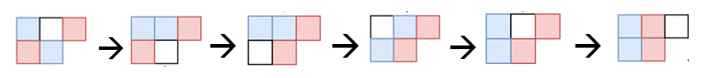

# Depth First Search, different order of actions
If we swap the order of the expanding actions when searching in depth, we will find a result, but it will not be optimal.

In [ ]:
problem_dfs2 = Problem(initial_state=State([[1, 2, 0], [2, 1]], 0, 2),
                goal=State([[1, 2, 0], [1, 2]], 0, 2),                      
                actions=['d', 'u', 'r', 'l'],
                )

In [ ]:
State.generated = 0
solution_dfs2 = problem_dfs2.graph_search(strategy='DFS')
print (f"Number of states searched is {State.generated}.")

In [ ]:
if solution_dfs2 is not None:
    print (solution_dfs2.path())
else:
    print ("The problem has no solution.")

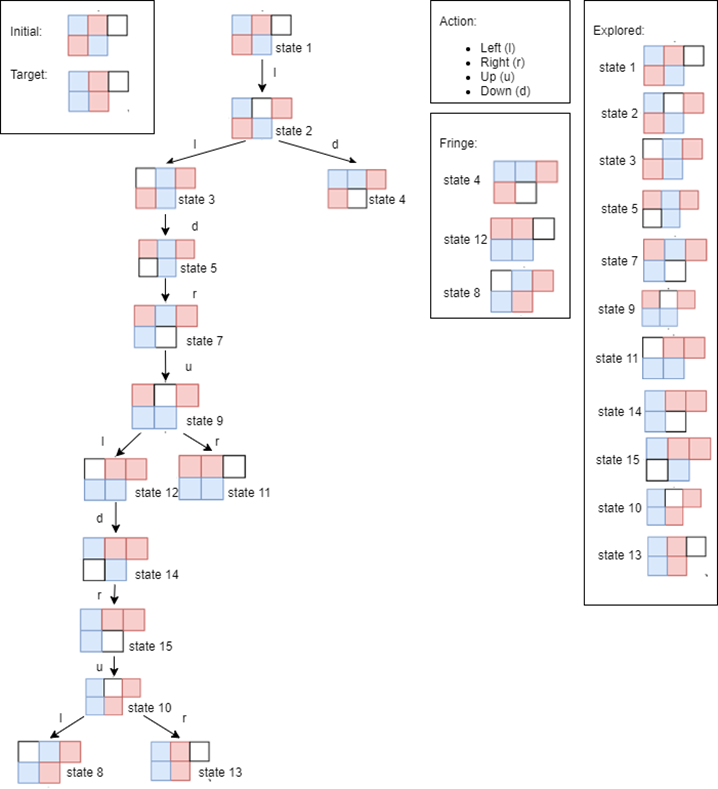